# Bayes Decision Rule
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement the calculation of **likelihood** of each features given particular class 
- implement the calculation of **posterior** of each class given particular feature
- implement the calculation of **minimal total risk** of bayes decision rule

In [2]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [3]:
data = sio.loadmat('data.mat')
x1_train, x1_test, x2_train, x2_test = data['x1_train'], data['x1_test'], data['x2_train'], data['x2_test']
# print(x1_train.shape, x1_test.shape, x2_train.shape, x2_test.shape)
all_x = np.concatenate([x1_train, x1_test, x2_train, x2_test], 1)
# print(all_x.shape)
data_range = [np.min(all_x), np.max(all_x)]
# print(x1_train)
# print(x2_train)

In [4]:
from get_x_distribution import get_x_distribution

train_x = get_x_distribution(x1_train, x2_train, data_range)
test_x = get_x_distribution(x1_test, x2_test, data_range)
print(train_x.shape, test_x.shape)

(2, 19) (2, 19)


## Part 1 likelihood
Your code for this section will be written inside **bayes_decision_rule/likehood.py**. 

[[0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.0025  0.02    0.155   0.3325  0.32    0.1525  0.015   0.0025  0.
  0.     ]
 [0.00125 0.00375 0.00375 0.01125 0.01625 0.05625 0.07125 0.08875 0.1225
  0.1225  0.12375 0.13    0.09625 0.0675  0.0375  0.02125 0.0175  0.005
  0.00375]]


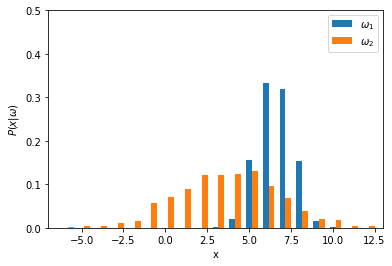

In [5]:
from likelihood import likelihood

l = likelihood(train_x)
print(l)
width = 0.35
p1 = plt.bar(np.arange(data_range[0], data_range[1] + 1), l.T[:,0], width)
p2 = plt.bar(np.arange(data_range[0], data_range[1] + 1) + width, l.T[:,1], width)
plt.xlabel('x')
plt.ylabel('$P(x|\omega)$')
plt.legend((p1[0], p2[0]), ('$\omega_1$', '$\omega_2$'))
plt.axis([data_range[0] - 1, data_range[1] + 1, 0, 0.5])
plt.show()

In [6]:
#TODO
#compute the number of all the misclassified x using maximum likelihood decision rule

# begin answer
miss = np.zeros(train_x.shape)
miss[0, l[0] < l[1]] = 1
miss[1, l[0] > l[1]] = 1
print(miss)
miss_num = np.sum(miss * test_x, axis=1)
print(test_x)
print(miss_num)
miss_rate = miss_num / np.sum(test_x, axis=1)
print(np.sum(test_x, axis=1))
print(miss_rate)
print(np.sum(miss_num) / np.sum(test_x))
# end answer


[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0.]]
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2. 12. 30. 43. 12.  1.  0.  0.
   0.]
 [ 0.  0.  0.  3. 10.  7.  9. 25. 24. 30. 24. 29.  9. 10. 13.  3.  3.  1.
   0.]]
[ 3. 61.]
[100. 200.]
[0.03  0.305]
0.21333333333333335


## Part 2 posterior
Your code for this section will be written inside **bayes_decision_rule/posterior.py**. 

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.01010101 0.07476636 0.37349398
  0.63333333 0.7032967  0.67032967 0.26086957 0.06666667 0.
  0.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         0.98989899 0.92523364 0.62650602
  0.36666667 0.2967033  0.32967033 0.73913043 0.93333333 1.
  1.        ]]


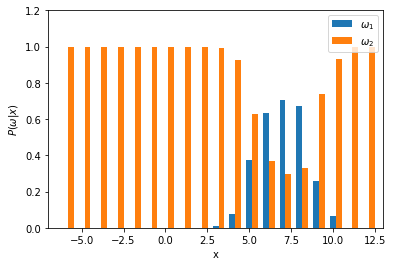

In [7]:
from posterior import posterior

p = posterior(train_x)
print(p)
width = 0.35
p1 = plt.bar(np.arange(data_range[0], data_range[1] + 1), p.T[:,0], width)
p2 = plt.bar(np.arange(data_range[0], data_range[1] + 1) + width, p.T[:,1], width)
plt.xlabel('x')
plt.ylabel('$P(\omega|x)$')
plt.legend((p1[0], p2[0]), ('$\omega_1$', '$\omega_2$'))
plt.axis([data_range[0] - 1, data_range[1] + 1, 0, 1.2])
plt.show()

In [35]:
#TODO
#compute the number of all the misclassified x using optimal bayes decision rule

# begin answer
miss = np.zeros(train_x.shape)
miss[0, p[0] < p[1]] = 1
miss[1, p[0] > p[1]] = 1
print(miss)
miss_num = np.sum(miss * test_x, axis=1)
print(test_x)
print(miss_num)
miss_rate = miss_num / np.sum(test_x, axis=1)
print(np.sum(test_x, axis=1))
print(miss_rate)
print(np.sum(miss_num) / np.sum(test_x))
# end answer


[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]]
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2. 12. 30. 43. 12.  1.  0.  0.
   0.]
 [ 0.  0.  0.  3. 10.  7.  9. 25. 24. 30. 24. 29.  9. 10. 13.  3.  3.  1.
   0.]]
[15. 32.]
[0.15 0.16]
0.15666666666666668


## Part 3 risk


In [38]:
risk = np.array([[0, 1], [2, 0]])
#TODO
#get the minimal risk using optimal bayes decision rule and risk weights

# begin answer
print(p)
r = risk @ p
print(r)
R = np.sum(np.min(r, axis=0) * np.sum(test_x, axis=0))
print(R)
# end answer

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.01010101 0.07476636 0.37349398
  0.63333333 0.7032967  0.67032967 0.26086957 0.06666667 0.
  0.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         0.98989899 0.92523364 0.62650602
  0.36666667 0.2967033  0.32967033 0.73913043 0.93333333 1.
  1.        ]]
[[0 1]
 [2 0]]
70.93464755007423
